In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
iris = sns.load_dataset('iris')

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
iris.shape

(150, 5)

In [36]:
iris.size

750

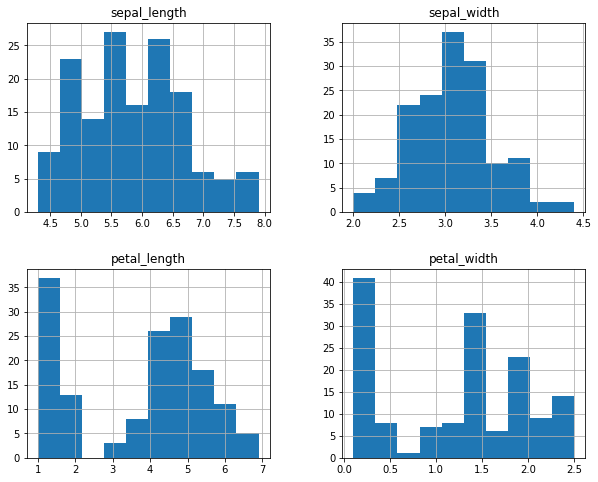

In [37]:
iris.hist(figsize=(10,8))
plt.show()

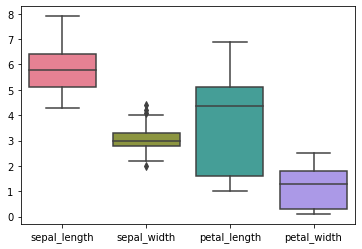

In [38]:
sns.boxplot(data=iris, palette='husl')
plt.show()

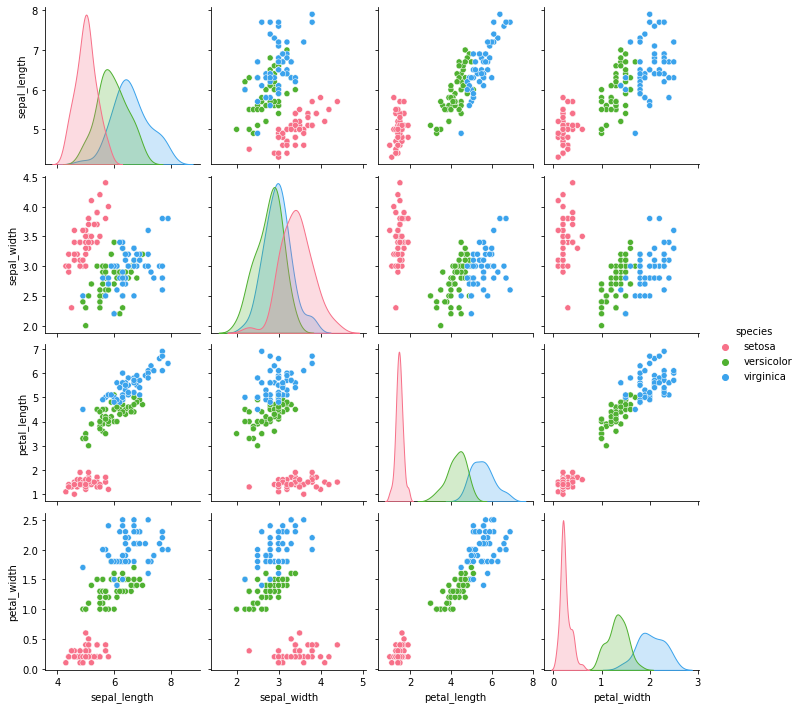

In [39]:
# Use Seaborn's pairplot to visualize the pairwise relationships between the features
sns.pairplot(data=iris, hue='species', palette='husl')
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

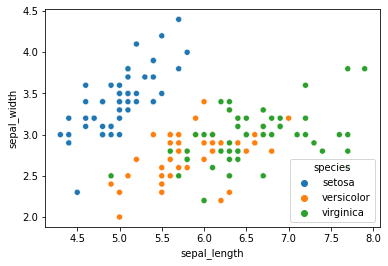

In [52]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

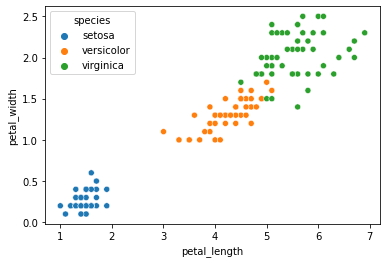

In [53]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)

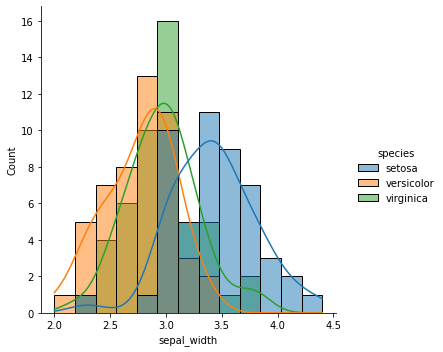

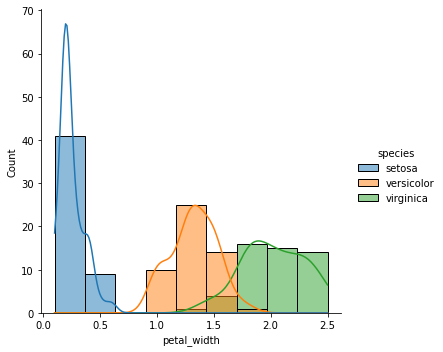

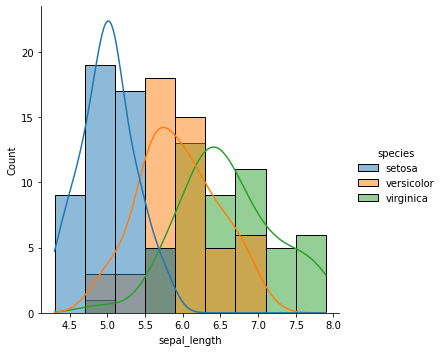

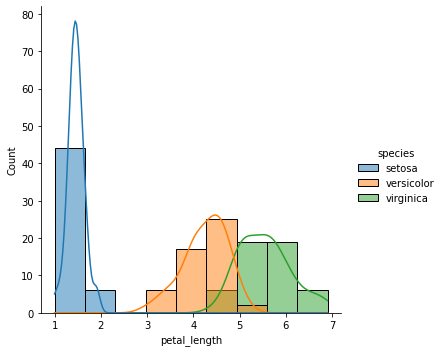

In [62]:
sns.displot(data=iris, x='sepal_width', hue='species', kde=True)
sns.displot(data=iris, x='petal_width', hue='species', kde=True)
sns.displot(data=iris, x='sepal_length', hue='species', kde=True)
sns.displot(data=iris, x='petal_length', hue='species', kde=True)

In [63]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation On Iris Classes')

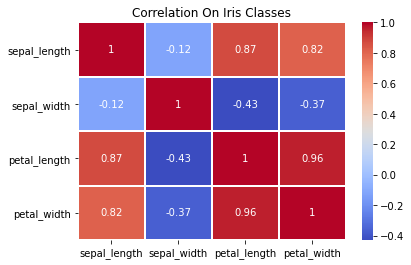

In [22]:
sns.heatmap(iris.corr(),cmap="coolwarm", linecolor='white', linewidths=1,annot=True)
plt.title('Correlation On Iris Classes')

In [65]:
# Identify outliers
outliers = {}
for feature in iris.columns[:-1]:
    q1 = iris[feature].quantile(0.25)
    q3 = iris[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    feature_outliers = iris[(iris[feature] < lower_bound) | (iris[feature] > upper_bound)]
    outliers[feature] = feature_outliers.index.tolist()


In [66]:
# Print the indices of outliers for each feature
for feature in outliers:
    print(f"{feature} outliers: {outliers[feature]}")

sepal_length outliers: []
sepal_width outliers: [15, 32, 33, 60]
petal_length outliers: []
petal_width outliers: []


In [68]:
feature_types = iris.dtypes
print("Features and their types:")
print(feature_types)

Features and their types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [70]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

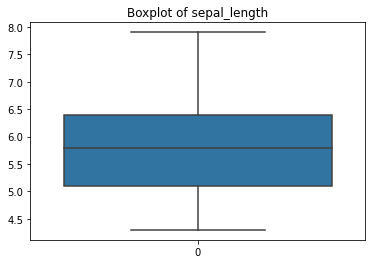

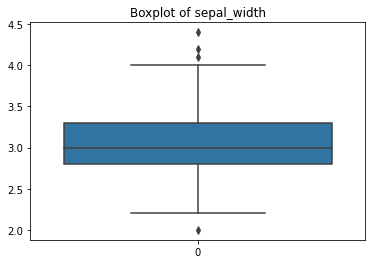

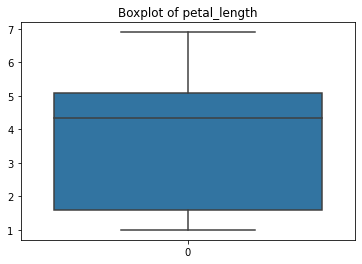

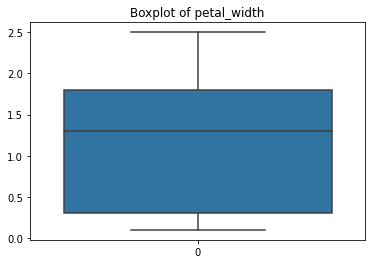

In [72]:
for feature in column_names[:-1]:
    sns.boxplot(data=iris[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
# # Importing
# import sklearn
# from sklearn.datasets import load_boston
# import pandas as pd
# import seaborn as sns

# # Load the dataset
# df = pd.read_csv('iris.csv')

# # IQR
# Q1 = np.percentile(df['sepal.width'], 25,
# 				interpolation = 'midpoint')

# Q3 = np.percentile(df['sepal.width'], 75,
# 				interpolation = 'midpoint')
# IQR = Q3 - Q1

# print("Old Shape: ", df.shape)

# # Upper bound
# upper = np.where(df['sepal.width'] >= (Q3+1.5*IQR))

# # Lower bound
# lower = np.where(df['sepal.width'] <= (Q1-1.5*IQR))

# # Removing the Outliers
# df.drop(upper[0], inplace = True)
# df.drop(lower[0], inplace = True)

# print("New Shape: ", df.shape)

# sns.boxplot(x='sepal.width', data=df)